# Estimates of Location, Variability and Bias

In [1]:
import pandas as pd

We Use the Cumulative Database of Objects of Interest of the Kepler Exoplanet Observatory at https://exoplanetarchive.ipac.caltech.edu/docs/data.html

In this notebook we perform the Database Cleaning Procedure, the Exploratory Analysis of Data for the Planet Radius and the Visualization of the Data

In [2]:
# Load the exoplanet database
data_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr&format=csv"
df_kepler = pd.read_csv(data_url)

In [3]:
df_kepler.head()

,kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr
0,10797460,K00752.01,CONFIRMED,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,35.8
1,10797460,K00752.02,CONFIRMED,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,25.8
2,10811496,K00753.01,CANDIDATE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3
3,10848459,K00754.01,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6
4,10854555,K00755.01,CONFIRMED,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9


Size of the Dataframe

In [4]:
df_kepler.shape

(9564, 11)

Names of the Colums

In [5]:
df_kepler.columns

Index(['kepid', 'kepoi_name', 'koi_disposition', 'koi_period', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr'],
      dtype='object')

Data Types

In [6]:
df_kepler.dtypes

kepid                int64
kepoi_name          object
koi_disposition     object
koi_period         float64
koi_impact         float64
koi_duration       float64
koi_depth          float64
koi_prad           float64
koi_teq            float64
koi_insol          float64
koi_model_snr      float64
dtype: object

Dataframe Cleaning

In [7]:
nans_per_column=df_kepler.isna().sum(axis=0)
nans_per_column

kepid                0
kepoi_name           0
koi_disposition      0
koi_period           0
koi_impact         363
koi_duration         0
koi_depth          363
koi_prad           363
koi_teq            363
koi_insol          321
koi_model_snr      363
dtype: int64

Drop All NaNs

In [8]:
df_kepler_clean=df_kepler.dropna().reset_index(drop=True)
df_kepler_clean

,kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr
0,10797460,K00752.01,CONFIRMED,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,35.8
1,10797460,K00752.02,CONFIRMED,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,25.8
2,10811496,K00753.01,CANDIDATE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3
3,10848459,K00754.01,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6
4,10854555,K00755.01,CONFIRMED,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9
...,...,...,...,...,...,...,...,...,...,...,...
9196,10090151,K07985.01,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3
9197,10128825,K07986.01,CANDIDATE,1.739849,0.043,3.11400,48.5,0.72,1608.0,1585.81,10.6
9198,10147276,K07987.01,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,1.07,2218.0,5713.41,12.3
9199,10155286,K07988.01,CANDIDATE,333.486169,0.214,3.19900,639.1,19.30,557.0,22.68,14.0


## Estimates of Location, Variability and Bias for the Planet Radius

In the rest of the notebook, we focus on the planet radius variable.

In [9]:
planet_radius=df_kepler_clean['koi_prad']

Location: Mean and Median

In [10]:
print(f'The mean planetary radius in {planet_radius.mean()}, and the Median is {planet_radius.median()}' )

The mean planetary radius in 102.89177806760135, and the Median is 2.39


The above result shows that there is a huge disparity between the mean and the median, suggesting the presence of outliers in the tails. A more robust estimator for the center of the distribution is the trimmed mean.

In [11]:
from scipy.stats import trim_mean

In [12]:
print(f'The 20% truncated mean is :{trim_mean(planet_radius,0.2)}')

The 20% truncated mean is :4.664966491577612


Estimators of Variability

In [13]:
print(f'The standard deviation is {planet_radius.std()}')

The standard deviation is 3077.6391262221828


In [14]:
print(f'The maximum value for the radius is {planet_radius.max()}, and the minimum is {planet_radius.min()}')

The maximum value for the radius is 200346.0, and the minimum is 0.08


Estimates based on percentiles

In [15]:
print(f'The first quartile is located at {planet_radius.quantile(0.25)}, and the third one at {planet_radius.quantile(0.75)}')

The first quartile is located at 1.4, and the third one at 14.93


Interquartile Range

In [16]:
iqr=planet_radius.quantile(0.75)-planet_radius.quantile(0.25)
print(f'The interquartile range is {iqr}')

The interquartile range is 13.53


Higher Statistical Moments

In [17]:
print(f'The Planet Radius Skewness is {planet_radius.skew()}, and its relative Kurtosis is {planet_radius.kurtosis()}')

The Planet Radius Skewness is 52.11895420603228, and its relative Kurtosis is 2974.9107107967575


## Filtering

The huge disparity between the mean an the median, and among the standard deviation and the interquartile range suggest that there are a lot of outliers in the tails that can be discarded for a better analysis of the data.

In [18]:
def filter(df,col,iqr_score):
  iqr_col=df[col].quantile(0.75)-df[col].quantile(0.25)
  filter_lower=df[col]>df[col].quantile(0.25)-(iqr_col*iqr_score)
  filter_upper=df[col]<df[col].quantile(0.75)+(iqr_col*iqr_score)
  return df[filter_lower & filter_upper]

Filtered Dataframe with respect to Planetary Radius

In [19]:
df_filtered=df_kepler_clean.copy()
df_filtered=filter(df_kepler_clean,'koi_prad',2)

## Estimates of Location, Variability and Bias for the Planet Radius in the Filtered Dataframe

In [20]:
planet_radius_fil=df_filtered['koi_prad']

Location: Mean and Median

In [21]:
print(f'The mean planetary radius in {planet_radius_fil.mean()}, and the Median is {planet_radius_fil.median()}' )

The mean planetary radius in 5.983313668884147, and the Median is 2.08


In [22]:
print(f'The 20% truncated mean is :{trim_mean(planet_radius_fil,0.2)}')

The 20% truncated mean is :2.3407948128006693


Estimators of Variability

In [23]:
print(f'The standard deviation is {planet_radius_fil.std()}')

The standard deviation is 9.339570494258066


In [24]:
print(f'The maximum value for the radius is {planet_radius_fil.max()}, and the minimum is {planet_radius_fil.min()}')

The maximum value for the radius is 41.84, and the minimum is 0.08


Estimates based on percentiles

In [25]:
print(f'The first quartile is located at {planet_radius_fil.quantile(0.25)}, and the third one at {planet_radius_fil.quantile(0.75)}')

The first quartile is located at 1.31, and the third one at 3.9450000000000003


Interquartile Range

In [26]:
iqr_fil=planet_radius_fil.quantile(0.75)-planet_radius_fil.quantile(0.25)
print(f'The interquartile range is {iqr_fil}')

The interquartile range is 2.6350000000000002


Higher Statistical Moments

In [27]:
print(f'The Planet Radius Skewness is {planet_radius_fil.skew()}, and its relative Kurtosis is {planet_radius_fil.kurtosis()}')

The Planet Radius Skewness is 2.2853973411240904, and its relative Kurtosis is 4.165212647859917


# Data Visualization

### Boxplot: Uses Percentiles to Show the Data Distribution

In [28]:
import seaborn as sns

[Text(0.5, 0, 'Exoplanet Radius (Terrestrial Radii)')]

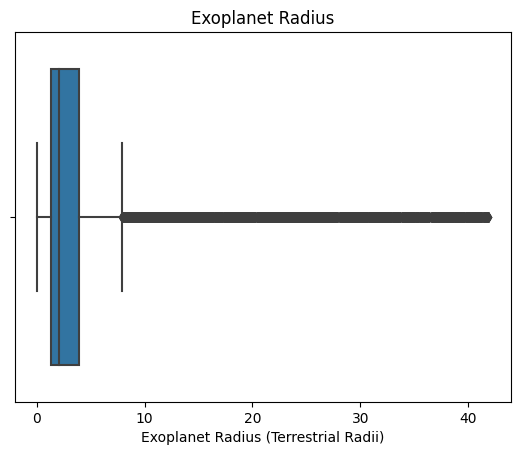

In [29]:
ax0=sns.boxplot(x=df_filtered['koi_prad'])
ax0.set_title ('Exoplanet Radius')
ax0.set(xlabel='Exoplanet Radius (Terrestrial Radii)')

### Frequency Table

In [30]:
import numpy as np

Number of Bins: Sturge's Rule

In [31]:
bins_radius=int(1+np.log2(planet_radius_fil.size))
print(f"According to Sturge's rule, the optimal number of bins for the radii is {bins_radius}")

According to Sturge's rule, the optimal number of bins for the radii is 13


In [32]:
frequencies_radius=pd.cut(planet_radius_fil,bins_radius)
frequencies_radius

0        (0.0382, 3.292]
1        (0.0382, 3.292]
2       (12.929, 16.142]
3       (32.203, 35.415]
4        (0.0382, 3.292]
              ...       
9196    (28.991, 32.203]
9197     (0.0382, 3.292]
9198     (0.0382, 3.292]
9199    (16.142, 19.354]
9200     (0.0382, 3.292]
Name: koi_prad, Length: 7967, dtype: category
Categories (13, interval[float64, right]): [(0.0382, 3.292] < (3.292, 6.505] < (6.505, 9.717] <
                                            (9.717, 12.929] ... (28.991, 32.203] <
                                            (32.203, 35.415] < (35.415, 38.628] < (38.628, 41.84]]

In [33]:
planet_radius_fil.groupby(frequencies_radius).count()

koi_prad
(0.0382, 3.292]     5691
(3.292, 6.505]       693
(6.505, 9.717]       237
(9.717, 12.929]      181
(12.929, 16.142]     148
(16.142, 19.354]     122
(19.354, 22.566]     135
(22.566, 25.778]     153
(25.778, 28.991]     141
(28.991, 32.203]     134
(32.203, 35.415]     106
(35.415, 38.628]     112
(38.628, 41.84]      114
Name: koi_prad, dtype: int64

### Histogram

[Text(0.5, 0, 'Exoplanet Radius (Terrestrial Radii)')]

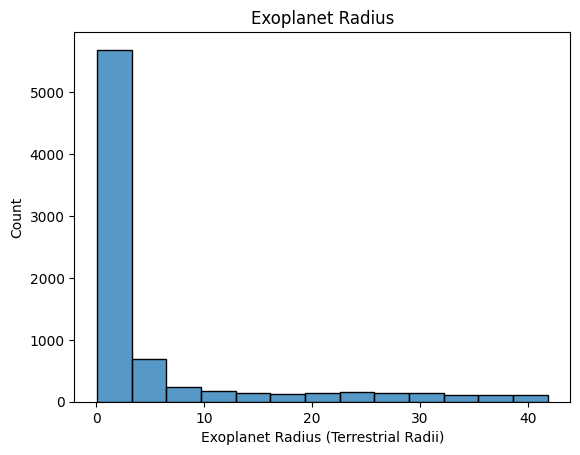

In [34]:
ax1=sns.histplot(planet_radius_fil,bins=bins_radius)
ax1.set_title ('Exoplanet Radius')
ax1.set(xlabel='Exoplanet Radius (Terrestrial Radii)')

### Kernel Density Estimation

[Text(0, 0.5, 'Probability Density')]

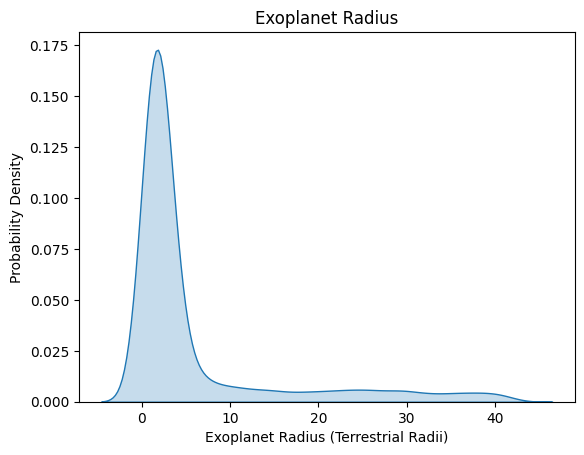

In [35]:
ax2=sns.kdeplot(planet_radius_fil,fill=True)
ax2.set_title ('Exoplanet Radius')
ax2.set(xlabel='Exoplanet Radius (Terrestrial Radii)')
ax2.set(ylabel='Probability Density')